In [4]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
df_crop = pandas.read_csv(r'C:\Users\Lenovo\Desktop\Crop-Yield-Prediction-master\Crop Yield Prediction\Data\crop_yield_datasource_preprocessed.csv')
df_crop.head()

,Location,Precipitation(mm),Minimum Temperature (degree Celsius),Mean Temperature(degree Celsius),Maximum Temperature(degree Celsius),Reference Crop Evapotranspiration (mm),Area (In Hectare),Production (In Tonnes),Yield (Tonnes/Hect.)
0,-0.5,0.391904,-0.004260,-0.161122,-0.256580,-0.422769,0.281736,0.240463,3.009976
1,-0.5,0.362928,-0.028595,-0.179207,-0.272203,-0.430218,0.429240,0.468128,3.203097
2,-0.5,0.341283,0.164969,-0.024770,-0.143458,-0.368765,0.128165,-0.010475,2.713547
3,-0.5,0.511259,0.053271,-0.114808,-0.218490,-0.402285,0.078254,0.037013,2.986351
4,-0.5,0.486288,0.000000,0.020897,-0.105440,-0.352006,0.387327,0.398733,3.141604


In [6]:
df_crop.columns = df_crop.columns.str.strip()
df_crop.columns

Index(['Location', 'Precipitation(mm)', 'Minimum Temperature (degree Celsius)',
       'Mean Temperature(degree Celsius)',
       'Maximum Temperature(degree Celsius)',
       'Reference Crop Evapotranspiration (mm)', 'Area (In Hectare)',
       'Production (In Tonnes)', 'Yield (Tonnes/Hect.)'],
      dtype='object')

In [7]:
x = df_crop.drop('Yield (Tonnes/Hect.)', axis=1)
x.head()

,Location,Precipitation(mm),Minimum Temperature (degree Celsius),Mean Temperature(degree Celsius),Maximum Temperature(degree Celsius),Reference Crop Evapotranspiration (mm),Area (In Hectare),Production (In Tonnes)
0,-0.5,0.391904,-0.004260,-0.161122,-0.256580,-0.422769,0.281736,0.240463
1,-0.5,0.362928,-0.028595,-0.179207,-0.272203,-0.430218,0.429240,0.468128
2,-0.5,0.341283,0.164969,-0.024770,-0.143458,-0.368765,0.128165,-0.010475
3,-0.5,0.511259,0.053271,-0.114808,-0.218490,-0.402285,0.078254,0.037013
4,-0.5,0.486288,0.000000,0.020897,-0.105440,-0.352006,0.387327,0.398733


In [34]:
#test_train_split
x_train, x_test , y_train, y_test = train_test_split(x,df_crop['Yield (Tonnes/Hect.)'], test_size = 0.3, random_state=0)
print('shape of x_train is:', x_train.shape)
print('shape of x_test is:', x_test.shape)
print('shape of y_train is:', y_train.shape)
print('shape of y_test is:', y_test.shape)

shape of x_train is: (28, 8)
shape of x_test is: (12, 8)
shape of y_train is: (28,)
shape of y_test is: (12,)


**Multiple Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
print('number of slopes', len(model_lin.coef_) )
print('slopes are', model_lin.coef_)
print('Intercept is', model_lin.intercept_)

number of slopes 8
slopes are [ 0.51036933  0.22346373  0.4860834  -0.32835937 -0.24708101 -0.05178199
 -3.47358555  3.61711285]
Intercept is 3.1728268157729667


In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
pv_lin = model_lin.predict(x_test)
print('MSE of the model is', mean_squared_error(pv_lin, y_test))
print('R2 score is', r2_score(pv_lin, y_test))
pv_lin = model_lin.predict(x_test)
errors = abs(pv_lin-y_test)
mape = 100*errors/y_test
accuracy_lin1 = 100-numpy.mean(mape)
print("Accuracy is ",accuracy_lin1)

MSE of the model is 0.017805243601195495
R2 score is 0.8687050964049251
Accuracy is  96.71518156881793


**Decision Tree Regression**

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train,y_train)
pv_dtr = model_dtr.predict(x_test)

In [41]:
print('MSE of the model is', mean_squared_error(pv_dtr, y_test))
errors = abs(pv_dtr-y_test)
mape = 100*errors/y_test
accuracy_dtr1 = 100-numpy.mean(mape)
print("Accuracy is ",accuracy_dtr1)

MSE of the model is 0.17860033841890513
Accuracy is  91.22851200466917


**Support Vector Regression**

In [42]:
from sklearn.svm import SVR

In [43]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
pv_reg = svr_regressor.predict(x_test)
print('MSE of the model is', mean_squared_error(pv_reg, y_test))
errors = abs(pv_reg-y_test)
mape = 100*errors/y_test
accuracy_reg1= 100-numpy.mean(mape)
print("Accuracy is ",accuracy_reg1)

MSE of the model is 0.06992391707118108
Accuracy is  92.77202575702157


**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 3)
forest_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [47]:
pv_forest = forest_regressor.predict(x_test)
print('MSE of the model is', mean_squared_error(pv_forest, y_test))
errors = abs(pv_forest-y_test)
mape = 100*errors/y_test
accuracy_forest1 = 100-numpy.mean(mape)
print("Accuracy is ",accuracy_forest1)

MSE of the model is 0.05951330589726963
Accuracy is  93.47529308387303


**when training data is 75%**

In [48]:
x_train, x_test , y_train, y_test = train_test_split(x,df_crop['Yield (Tonnes/Hect.)'], test_size = 0.25, random_state=0)

In [49]:
#Linear Regression
pv_lin = model_lin.predict(x_test)
errors = abs(pv_lin-y_test)
mape = 100*errors/y_test
accuracy_lin2 = 100-numpy.mean(mape)
print("Accuracy is ",accuracy_lin2)

Accuracy is  96.95180384394183


In [50]:
#DecisionTreeRegressor
pv_dtr = model_dtr.predict(x_test)
errors = abs(pv_dtr-y_test)
mape = 100*errors/y_test
accuracy_dtr2 = 100-numpy.mean(mape)
print(accuracy_dtr2)

92.09534630299237


In [51]:
#SVR
pv_reg = svr_regressor.predict(x_test)
errors = abs(pv_reg-y_test)
mape = 100*errors/y_test
accuracy_reg2 = 100-numpy.mean(mape)
print(accuracy_reg2)

92.86851368341117


In [52]:
#RandomForestRegressor
pv_forest = forest_regressor.predict(x_test)
errors = abs(pv_forest-y_test)
mape = 100*errors/y_test
accuracy_forest2 = 100-numpy.mean(mape)
print(accuracy_forest2)

93.23002521986172


**when training data is 80%**

In [53]:
x_train, x_test , y_train, y_test = train_test_split(x,df_crop['Yield (Tonnes/Hect.)'], test_size = 0.2, random_state=0)

In [54]:
#Linear Regression
pv_lin = model_lin.predict(x_test)
errors = abs(pv_lin-y_test)
mape = 100*errors/y_test
accuracy_lin3 = 100-numpy.mean(mape)
print("Accuracy is ",accuracy_lin3)

Accuracy is  97.45229784926478


In [55]:
#DecisionTreeRegressor
pv_dtr = model_dtr.predict(x_test)
errors = abs(pv_dtr-y_test)
mape = 100*errors/y_test
accuracy_dtr3 = 100-numpy.mean(mape)
print(accuracy_dtr3)

90.84055257441557


In [56]:
#SVR
pv_reg = svr_regressor.predict(x_test)
errors = abs(pv_reg-y_test)
mape = 100*errors/y_test
accuracy_reg3 = 100-numpy.mean(mape)
print(accuracy_reg3)

93.92684126620253


In [57]:
#RandomForestRegressor
pv_forest = forest_regressor.predict(x_test)
errors = abs(pv_forest-y_test)
mape = 100*errors/y_test
accuracy_forest3 = 100-numpy.mean(mape)
print(accuracy_forest3)

93.47887541803873


In [58]:
 import matplotlib.pyplot as plt 

In [59]:
train_list= [70,75,80]
accuracy_list_lin = [accuracy_lin1, accuracy_lin2, accuracy_lin3]
accuracy_list_dtr = [accuracy_dtr1, accuracy_dtr2, accuracy_dtr3]
accuracy_list_reg = [accuracy_reg1, accuracy_reg2, accuracy_reg3]
accuracy_list_forest = [accuracy_forest1, accuracy_forest2, accuracy_forest3]
print('Multiple Linear Regression accuracy:',accuracy_list_lin)
print('Decision Tree Accuracy:',accuracy_list_dtr)
print('Support Vector Regression Accuracy:',accuracy_list_reg)
print('Random Forest Regression Accuracy:',accuracy_list_forest)

Multiple Linear Regression accuracy: [96.71518156881793, 96.95180384394183, 97.45229784926478]
Decision Tree Accuracy: [91.22851200466917, 92.09534630299237, 90.84055257441557]
Support Vector Regression Accuracy: [92.77202575702157, 92.86851368341117, 93.92684126620253]
Random Forest Regression Accuracy: [93.47529308387303, 93.23002521986172, 93.47887541803873]


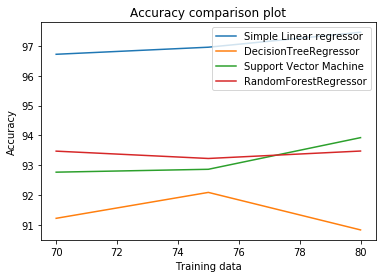

In [60]:
plt.plot(train_list,accuracy_list_lin, label='Simple Linear regressor')
plt.plot(train_list,accuracy_list_dtr, label='DecisionTreeRegressor')
plt.plot(train_list,accuracy_list_reg, label='Support Vector Machine')
plt.plot(train_list,accuracy_list_forest, label='RandomForestRegressor')
plt.title('Accuracy comparison plot')
plt.xlabel('Training data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# New dataset

In [61]:
df_crop_new = pandas.read_csv(r'C:\Users\Lenovo\Desktop\Crop-Yield-Prediction-master\Crop Yield Prediction\Data\New_crop_data.csv')
df_crop_new.head(7)

,Year,Location,Precipitation(mm),Minimum Temperature (degree Celsius),Mean Temperature(degree Celsius),Maximum Temperature(degree Celsius),Reference Crop Evapotranspiration (mm),Area (In Hectare),Production (In Tonnes)
0,2018,Mysore,337.080500,21.046833,24.516167,28.030833,3.796667,91522,275479
1,2019,Mysore,445.379833,20.080310,25.219000,28.733833,3.860000,99284,311911
2,2020,Mysore,324.421333,21.240167,24.712667,28.227500,3.813333,100912,276379
3,2018,Mandya,282.824333,20.207833,24.127167,28.085333,3.998333,72125,243674
4,2019,Mandya,392.419333,19.898500,23.813833,27.771500,3.968333,60924,180615
5,2020,Mandya,262.536667,19.955333,23.879500,27.837167,3.978333,38327,110983
6,2018,Raichur,98.317167,22.357667,27.046333,31.765833,4.675000,100632,273862


**preprocessing of new data**

In [62]:
new_data_processed= df_crop_new.iloc[:,1:9]
new_data_processed["Location"] = new_data_processed["Location"].replace(["Mysore", "Mandya", "Raichur", "Koppal"], [1,2,3,4])
new_data_processed = (new_data_processed - new_data_processed.mean()) / (new_data_processed.max() - new_data_processed.min())
print("*****Data cleanising result for new data*****\n")
print(new_data_processed.head())

*****Data cleanising result for new data*****

   Location  Precipitation(mm)  Minimum Temperature (degree Celsius)  \
0 -0.538462           0.337610                             -0.038142   
1 -0.538462           0.623115                             -0.416948   
2 -0.538462           0.304237                              0.037631   
3 -0.205128           0.194577                             -0.366968   
4 -0.205128           0.483497                             -0.488204   

   Mean Temperature(degree Celsius)  Maximum Temperature(degree Celsius)  \
0                         -0.265171                            -0.346712   
1                         -0.047744                            -0.170713   
2                         -0.204383                            -0.297476   
3                         -0.385512                            -0.333068   
4                         -0.482444                            -0.411638   

   Reference Crop Evapotranspiration (mm)  Area (In Hectare)  \

In [63]:
pv_lin_new =model_lin.predict(new_data_processed)
df_crop_new['yield prediction from MLR'] = pv_lin_new
print(df_crop_new.head(12))

    Year Location  Precipitation(mm)  Minimum Temperature (degree Celsius)  \
0   2018   Mysore         337.080500                             21.046833   
1   2019   Mysore         445.379833                             20.080310   
2   2020   Mysore         324.421333                             21.240167   
3   2018   Mandya         282.824333                             20.207833   
4   2019   Mandya         392.419333                             19.898500   
5   2020   Mandya         262.536667                             19.955333   
6   2018  Raichur          98.317167                             22.357667   
7   2019  Raichur          66.054500                             21.619000   
8   2020  Raichur          93.076000                             21.683833   
9   2018   Koppal         105.302667                             21.801667   
10  2019   Koppal          81.386667                             21.431000   
11  2020   Koppal         113.626667                            